(1427, 2100, 3)


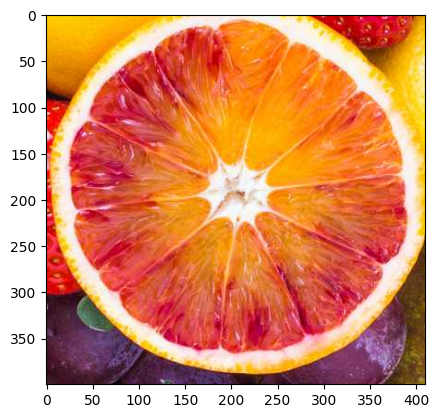

In [1]:
#1.1
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)
iio.imsave('orange.jpg',bmg)
plt.imshow(bmg)
plt.show()

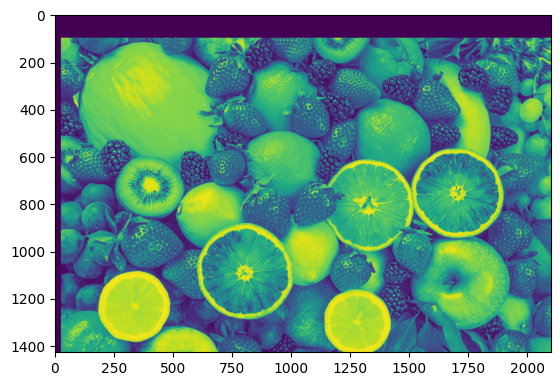

In [6]:
#1.2
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


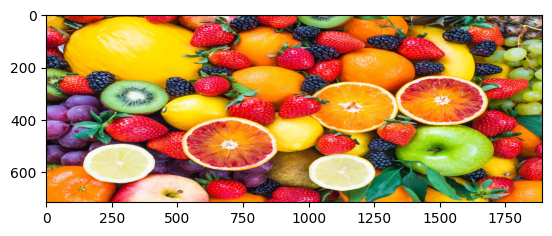

In [7]:
#1.3
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

(1427, 2100, 3)


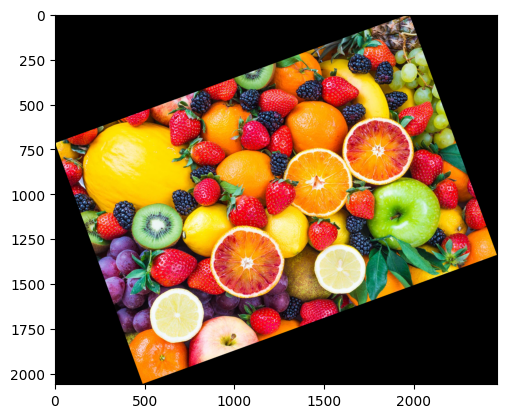

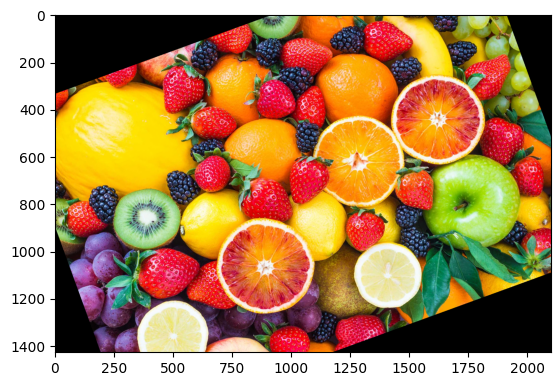

In [8]:
#1.4
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

dl = nd.rotate(data, 20)
plt.imshow(dl)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

(309, 515)


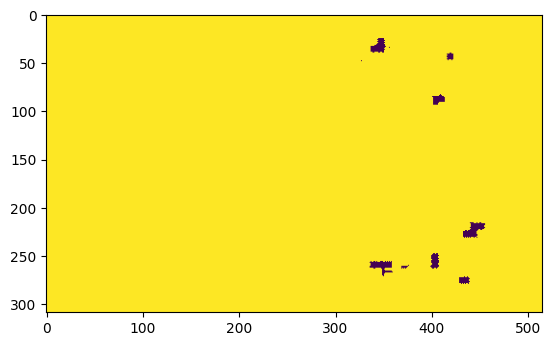

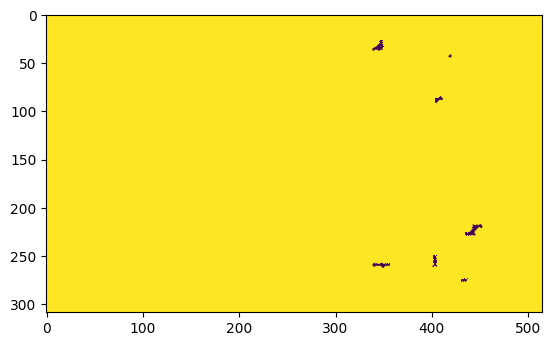

In [10]:
#1.5
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)

dl = nd.binary_dilation(data)
plt.imshow(dl)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

(309, 515)


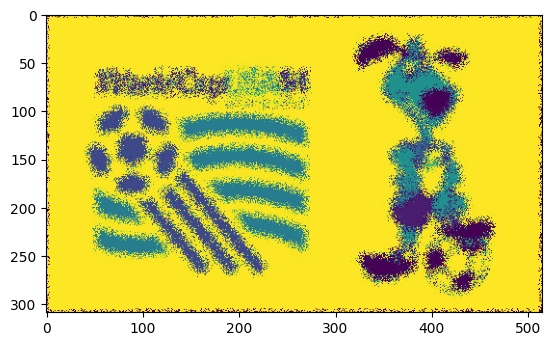

In [14]:
#1.6
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
V, H = data.shape

M = np.indices((V,H))

d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

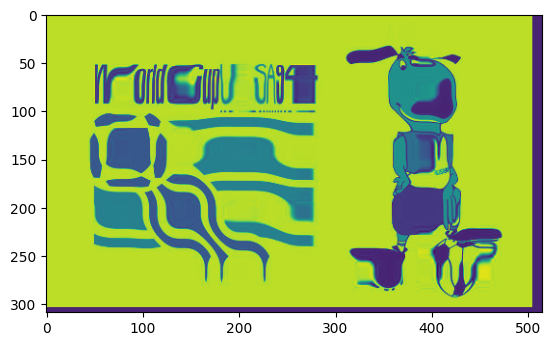

In [16]:
#1.7
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode='F')

dl = nd.geometric_transform(data, GeoFun)
plt.imshow(dl)
plt.show()

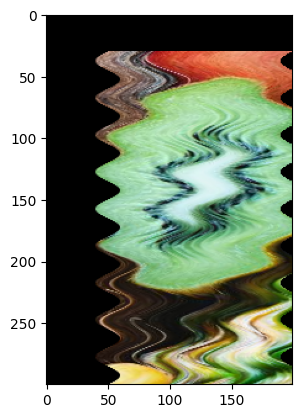

In [1]:
#b1
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
kiwi = data[900:1200, 400:600]

kiwi_translated = nd.shift(kiwi, (30, 50, 0))

rows, cols, ch = kiwi_translated.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
x_wave = x + 10 * np.sin(2 * np.pi * y / 30)
y_wave = y
indices = np.array([y_wave.ravel(), x_wave.ravel()])

kiwi_wave = np.empty_like(kiwi_translated)
for channel in range(3):
    kiwi_wave[..., channel] = nd.map_coordinates(kiwi_translated[..., channel], indices, order=1).reshape(rows, cols)

plt.imshow(kiwi_wave)
plt.show()

iio.imsave('kiwi_wave.jpg', kiwi_wave)

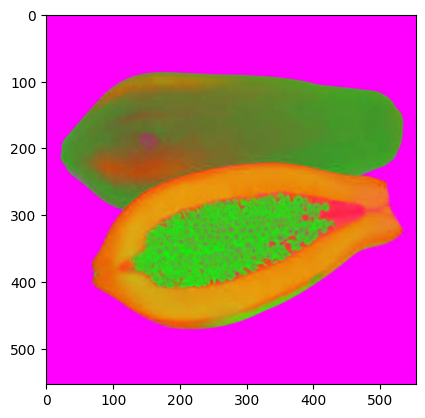

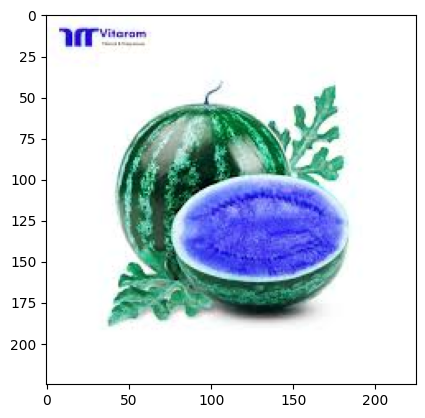

In [11]:
#b2
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
du_du = iio.imread('D:/XLA_lab3/dudu.jfif')
dua_hau = iio.imread('D:/XLA_lab3/duahau.jfif')

du_du[:,:,1] = 255 - du_du[:,:,1]

dua_hau[:,:,[0,2]] = dua_hau[:,:,[2,0]]

plt.imshow(du_du)
plt.show()

plt.imshow(dua_hau)
plt.show()
iio.imsave('D:/XLA_lab3/du_du_xanh.png', du_du)
iio.imsave('D:/XLA_lab3/dua_hau_tim.png', dua_hau)

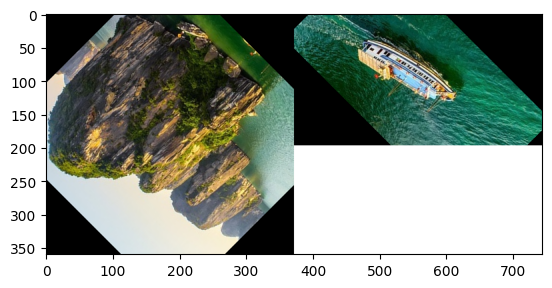

In [13]:
#b3
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/quang_ninh.jpg')
nui = data[0:360, 408:780]
thuyen = data[408:780, 408:780]

nui_rotated = nd.rotate(nui, 45, reshape=False)
thuyen_rotated = nd.rotate(thuyen, 45, reshape=False)

nui_mirror = np.flipud(nui_rotated)
thuyen_mirror = np.flipud(thuyen_rotated)

canvas = np.ones((max(nui_mirror.shape[0], thuyen_mirror.shape[0]),
                 nui_mirror.shape[1] + thuyen_mirror.shape[1], 3), dtype=np.uint8) * 255

canvas[:nui_mirror.shape[0], :nui_mirror.shape[1]] = nui_mirror
canvas[:thuyen_mirror.shape[0], nui_mirror.shape[1]:] = thuyen_mirror

iio.imsave('mountain_boat_mirror.jpg', canvas)
plt.imshow(canvas)
plt.show()

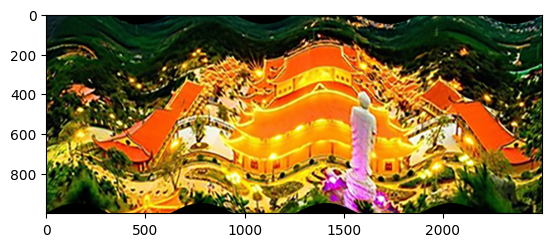

In [15]:
#b4
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/pagoda.jpg')
chua = data[100:300, 0:500]
chua_zoomed = nd.zoom(chua, (5, 5, 1))

def warp_transform(coords):
    x, y, z = coords  # Added z for color channel
    x = x + 50 * np.sin(y/100)
    return (x, y, z)  # Return all 3 coordinates

chua_warped = nd.geometric_transform(chua_zoomed, warp_transform)

iio.imsave('pagoda_warped.jpg', chua_warped)
plt.imshow(chua_warped)
plt.show()

Menu:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate Map

Chọn hình đeể xử lý:
1 - exercise/colorful-ripe-tropical-fruits.jpg
2 - exercise/quang_minh.jpg
3 - exercise/pagoda.jpg


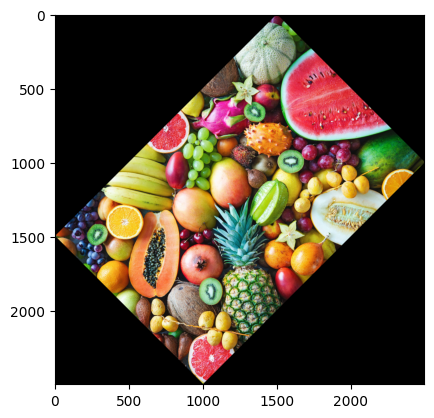

In [11]:
#b5
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def main():
    print("Menu:")
    print("T - Tịnh tiến")
    print("X - Xoay")
    print("P - Phóng to")
    print("H - Thu nhỏ")
    print("C - Coordinate Map")
    
    choice = input("Chọn phép biến đổi (T/X/P/H/C): ").upper()
    
    print("\nChọn hình đeể xử lý:")
    print("1 - exercise/colorful-ripe-tropical-fruits.jpg")
    print("2 - exercise/quang_minh.jpg")
    print("3 - exercise/pagoda.jpg")
    img_choice = input("Chọn hình (1/2/3): ")
    
    if img_choice == '1':
        filename = 'exercise/colorful-ripe-tropical-fruits.jpg'
    elif img_choice == '2':
        filename = 'exercise/quang_ninh.jpg'
    elif img_choice == '3':
        filename = 'exercise/pagoda.jpg'
    else:
        print("Lựa chọn không hợp lệ")
        return
    
    try:
        data = iio.imread(filename)
    except:
        print(f"Không thể đọc file {filename}")
        return
    
    if choice == 'T':
        # Tịnh tiến
        dx = int(input("Nhập số pixel tịnh tiến theo chiều ngang: "))
        dy = int(input("Nhập số pixel tịnh tiến theo chiều dọc: "))
        result = nd.shift(data, (dy, dx, 0) if len(data.shape) == 3 else nd.shift(data, (dy, dx)))
        plt.imshow(result)
        plt.show()
        
    elif choice == 'X':
        # Xoay
        angle = float(input("Nhập góc xoay (độ): "))
        result = nd.rotate(data, angle)
        plt.imshow(result)
        plt.show()
        
    elif choice == 'P':
        # Phóng to
        scale = float(input("Nhập tỉ lệ phóng to: "))
        result = nd.zoom(data, (scale, scale, 1) if len(data.shape) == 3 else nd.zoom(data, scale))
        plt.imshow(result)
        plt.show()
        
    elif choice == 'H':
        # Thu nhỏ
        scale = float(input("Nhập tỉ lệ thu nhỏ: "))
        result = nd.zoom(data, (scale, scale, 1) if len(data.shape) == 3 else nd.zoom(data, scale))
        plt.imshow(result)
        plt.show()
        
    elif choice == 'C':
        # Coordinate Map
        if len(data.shape) == 3:
            data = np.mean(data, axis=2)  # Chuyển sang ảnh xám nếu là ảnh màu
        
        V, H = data.shape
        M = np.indices((V,H))
        d = 5
        q = 2 * d * np.random.rand(M.shape[0], M.shape[1], M.shape[2]) - d
        mp = (M + q).astype(int)
        result = nd.map_coordinates(data, mp)
        plt.imshow(result, cmap='gray')
        plt.show()
        
    else:
        print("Lựa chọn không hợp lệ")

if __name__ == "__main__":
    main()